<a href="https://colab.research.google.com/github/Waleed-Azam/1D-CNN/blob/master/Estimating_all%20the%20dvl%20beams%20from%20the%20data%20set%20which%20is%20not%20in%20thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# univariate cnn example
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

Using TensorFlow backend.


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import numpy as np 
import matplotlib.pyplot as plt

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':'14RfDnc5maSGzxripjhH3Z6B2asdpFbbX'}) # replace the id with id of file you want to access'}) # replace the id with id of file you want to access
#https://drive.google.com/file/d/1agv3WTJF7GiaUwWJGDpDQfZwX_nApM-J/view?usp=sharing
#https://drive.google.com/file/d/14RfDnc5maSGzxripjhH3Z6B2asdpFbbX/view?usp=sharing

In [0]:
downloaded.GetContentFile('data_crupted_Alhumdulliah.csv')

In [6]:
import pandas as pd
df2 = pd.read_csv('data_crupted_Alhumdulliah.csv') 
df2

,Time,DVL1,DVL2,DVL3,DVL4,DVL1_S,DVL2_S,DVL3_S,DVL4_S
0,0.0,0.000,0.0,0.000000,0.000000,5.0,5.0,5.0,5.0
1,0.0,0.000,0.0,0.000000,0.000000,5.0,5.0,5.0,5.0
2,0.0,20.000,20.0,20.000000,20.000000,5.0,5.0,5.0,5.0
3,0.1,20.000,20.0,20.000000,20.000000,5.0,5.0,5.0,5.0
4,0.2,20.000,20.0,20.000000,20.000000,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...
3000,299.8,0.889,5.0,0.170960,0.314458,5.0,5.0,5.0,5.0
3001,299.9,0.889,5.0,0.170960,0.314458,5.0,5.0,5.0,5.0
3002,300.0,0.889,5.0,0.170960,0.314458,5.0,5.0,5.0,5.0
3003,300.1,0.889,5.0,0.170960,0.314458,5.0,5.0,5.0,5.0


In [7]:
df2["TRUE"] = df2["Time"].fillna(0)
df2["DVL1"] = df2["DVL1"].fillna(0)
df2["DVL2"] = df2["DVL2"].fillna(0)
df2["DVL3"] = df2["DVL3"].fillna(0)
df2["DVL4"] = df2["DVL4"].fillna(0)
df2["DVL1_S"] = df2["DVL1_S"].fillna(0)
df2["DVL2_S"] = df2["DVL2_S"].fillna(0)
df2["DVL3_S"] = df2["DVL3_S"].fillna(0)
df2["DVL4_S"] = df2["DVL4_S"].fillna(0)
df2

,Time,DVL1,DVL2,DVL3,DVL4,DVL1_S,DVL2_S,DVL3_S,DVL4_S,TRUE
0,0.0,0.000,0.0,0.000000,0.000000,5.0,5.0,5.0,5.0,0.0
1,0.0,0.000,0.0,0.000000,0.000000,5.0,5.0,5.0,5.0,0.0
2,0.0,20.000,20.0,20.000000,20.000000,5.0,5.0,5.0,5.0,0.0
3,0.1,20.000,20.0,20.000000,20.000000,5.0,5.0,5.0,5.0,0.1
4,0.2,20.000,20.0,20.000000,20.000000,5.0,5.0,5.0,5.0,0.2
...,...,...,...,...,...,...,...,...,...,...
3000,299.8,0.889,5.0,0.170960,0.314458,5.0,5.0,5.0,5.0,299.8
3001,299.9,0.889,5.0,0.170960,0.314458,5.0,5.0,5.0,5.0,299.9
3002,300.0,0.889,5.0,0.170960,0.314458,5.0,5.0,5.0,5.0,300.0
3003,300.1,0.889,5.0,0.170960,0.314458,5.0,5.0,5.0,5.0,300.1


In [0]:
t=df2['Time']
Tdata=df2['DVL1']
X=np.array(Tdata)
y=df2['DVL1_S']
y=np.array(y)
import numpy as np

In [0]:
def split_sequence(sequence, n_steps):
	X, z = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_z = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		z.append(seq_z)
	return array(X), array(z)

In [0]:
scaled_data=X

In [0]:
# define input sequence
raw_seq = X
# choose a number of time steps
n_steps = 10
# split into samples
X, z = split_sequence(raw_seq, n_steps)

In [0]:
X, z = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [0]:
Label=y

In [0]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	Label, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		Label.append(seq_x)
		y.append(seq_y)
	return array(Label), array(y)

In [0]:
raw_seq = Label
# choose a number of time steps
n_steps = 10
# split into samples
Label, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
Label = Label.reshape((Label.shape[0], Label.shape[1], n_features))

In [0]:
X_train  = np.array(X[:2500])
y_train = np.array(y[:2995])

X_test = np.array(X[-2500:])
y_test = np.array(y[-2995:])

In [0]:
dates = df2['Time']
train_date = dates[:2500]
test_date = dates[-2500:]

In [0]:
X = X_train
y = y_train

In [0]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [0]:
history=model.fit(X, y, epochs=20, verbose=0)

In [0]:
#Prediction 
# demonstrate prediction
import math
y_pred=[]
for i in X_test:
    
    x_input = i
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    y_pred.append(float(yhat[0]))

# import numpy as np
# yp = list(np.around(np.array(y_pred),1))
# yt = list(np.around((y_test),1))
    
# y_pred = [ '%.1f' % elem for elem in y_pred ]
# y_test = [ '%.1f' % elem for elem in y_pred ]

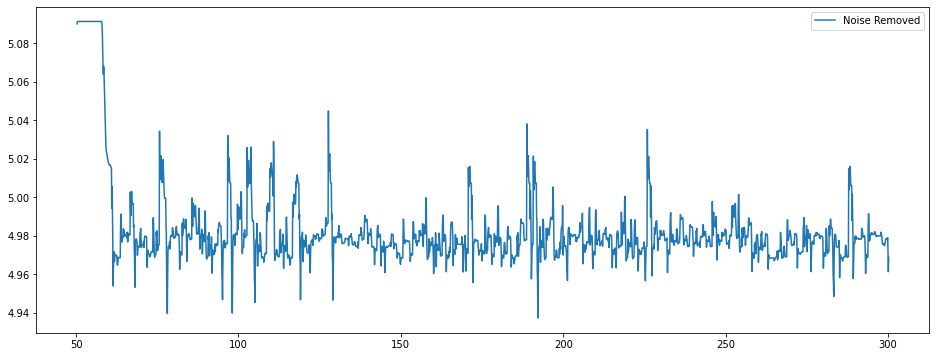

In [47]:
plt.figure(figsize = (16,6))
plt.plot(test_date,y_pred,label="Noise Removed")
#plt.plot(dates,scaled_data,label="Actual Data")
plt.legend()
plt.show()

In [0]:
scaled_data_1=scaled_data[-2500:]

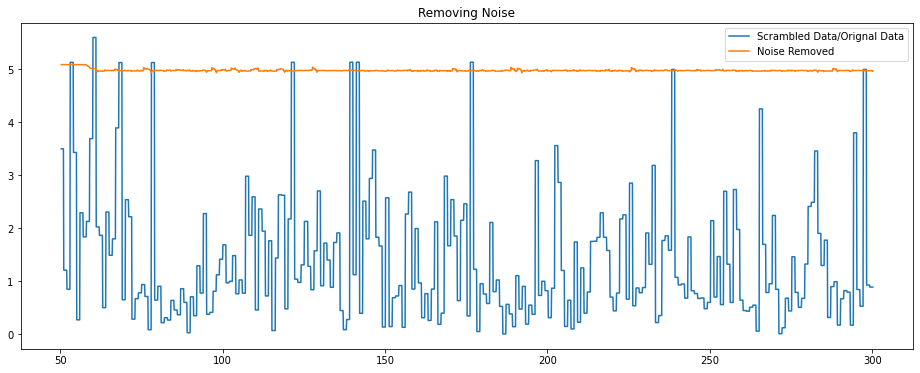

In [49]:
plt.figure(figsize = (16,6))
plt.plot(test_date,scaled_data_1, label="Scrambled Data/Orignal Data")
plt.plot(test_date,y_pred,label="Noise Removed")
#plt.plot(dates,scaled_data,label="Actual Data")
plt.legend()
plt.title("Removing Noise")
plt.show()

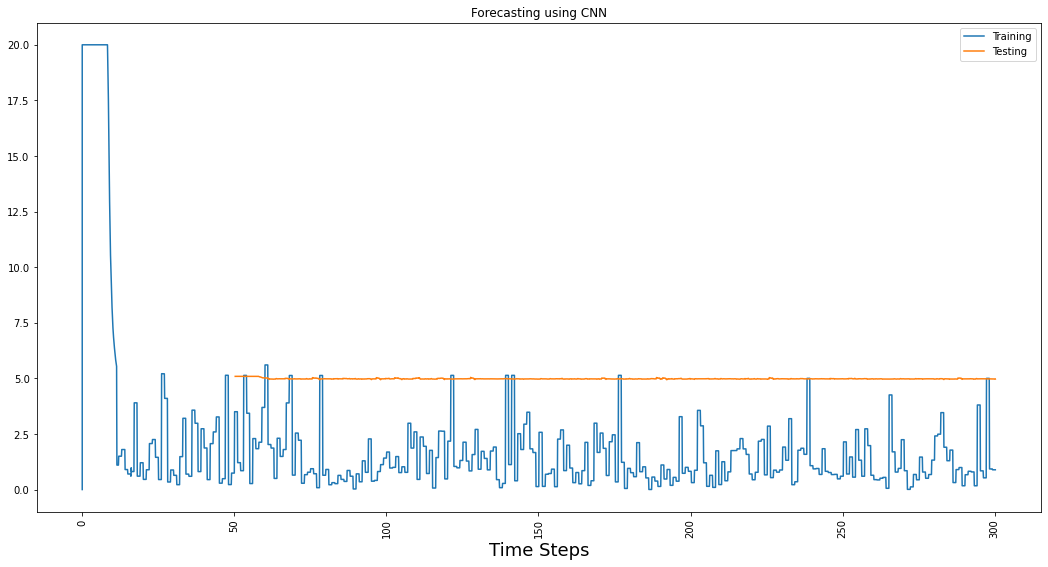

In [50]:
plt.figure(figsize = (18,9))

plt.plot(dates,scaled_data,label="Training")
plt.plot(test_date,y_pred,label="Testing")
#plt.plot(test_date,y_test,label="actual ")

plt.xticks(rotation=90)
plt.xlabel('Time Steps',fontsize=18)
plt.legend()
plt.title("Forecasting using CNN")
plt.show()

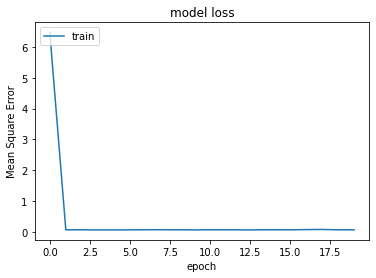

In [51]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Mean Square Error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
t=df2['Time']
T1data=df2['DVL2']
X1=np.array(T1data)
y1=df2['DVL2_S']
y1=np.array(y1)
import numpy as np

In [0]:
def split_sequence(sequence, n_steps):
	X1, z1 = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_z1 = sequence[i:end_ix], sequence[end_ix]
		X1.append(seq_x)
		z1.append(seq_z1)
	return array(X1), array(z1)

In [0]:
scaled_data1=X1

In [0]:
# define input sequence
raw_seq1 = X1
# choose a number of time steps
n_steps = 10
# split into samples
X1, z1 = split_sequence(raw_seq1, n_steps)

In [0]:
X1, z1 = split_sequence(raw_seq1, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X1 = X1.reshape((X1.shape[0], X1.shape[1], n_features))

In [0]:
Label1=y1

In [0]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	Label1, y_1 = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		Label1.append(seq_x)
		y_1.append(seq_y)
	return array(Label1), array(y_1)

In [0]:
raw_seq1 = Label1
# choose a number of time steps
n_steps = 10
# split into samples
Label1, y_1 = split_sequence(raw_seq1, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
Label1 = Label1.reshape((Label1.shape[0], Label1.shape[1], n_features))

In [0]:
X_train1  = np.array(X1[:2500])
y_train1 = np.array(y_1[:2500])

X_test1 = np.array(X1[-2500:])
y_test1 = np.array(y_1[-2500:])

In [61]:
print("X_train1 size: {}".format(X_train1.shape))
print("y_train1 size: {}".format(y_train1.shape))
print("X_test1 size: {}".format(X_test1.shape))
print("y_test1 size: {}".format(y_test1.shape))

X_train1 size: (2500, 10, 1)
y_train1 size: (2500,)
X_test1 size: (2500, 10, 1)
y_test1 size: (2500,)


In [0]:
dates = df2['Time']
train_date = dates[:2500]
test_date = dates[-2500:]

In [0]:
X1 = X_train1
y1 = y_train1

In [0]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [0]:
history=model.fit(X1, y1, epochs=20, verbose=0)

In [0]:
#Prediction 
# demonstrate prediction
import math
y_pred1=[]
for i in X_test1:
    
    x_input = i
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    y_pred1.append(float(yhat[0]))

# import numpy as np
# yp = list(np.around(np.array(y_pred),1))
# yt = list(np.around((y_test),1))
    
# y_pred = [ '%.1f' % elem for elem in y_pred ]
# y_test = [ '%.1f' % elem for elem in y_pred ]

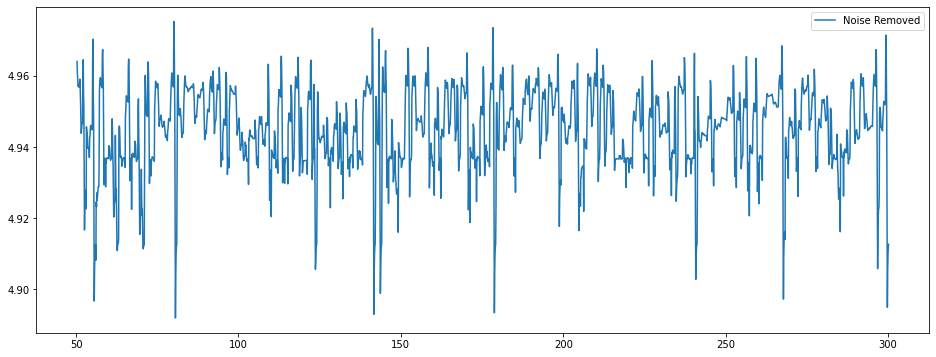

In [67]:
plt.figure(figsize = (16,6))
plt.plot(test_date,y_pred1,label="Noise Removed")
#plt.plot(dates,scaled_data,label="Actual Data")
plt.legend()
plt.show()

In [0]:
scaled_data1_1=scaled_data1[-2500:]

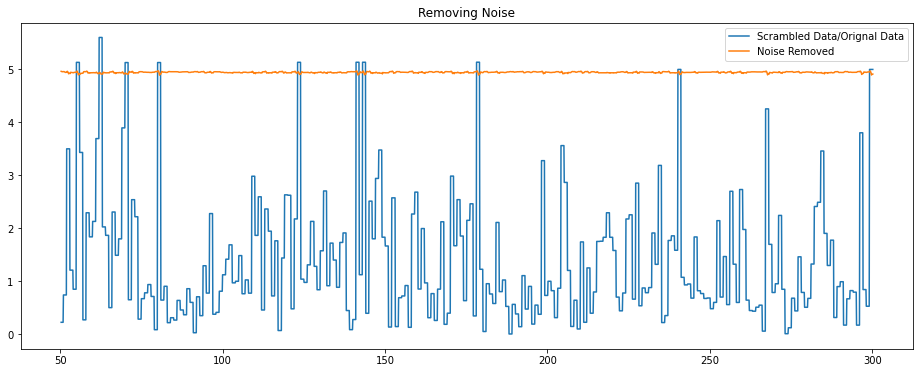

In [69]:
plt.figure(figsize = (16,6))
plt.plot(test_date,scaled_data1_1, label="Scrambled Data/Orignal Data")
plt.plot(test_date,y_pred1,label="Noise Removed")
#plt.plot(dates,scaled_data,label="Actual Data")
plt.legend()
plt.title("Removing Noise")
plt.show()

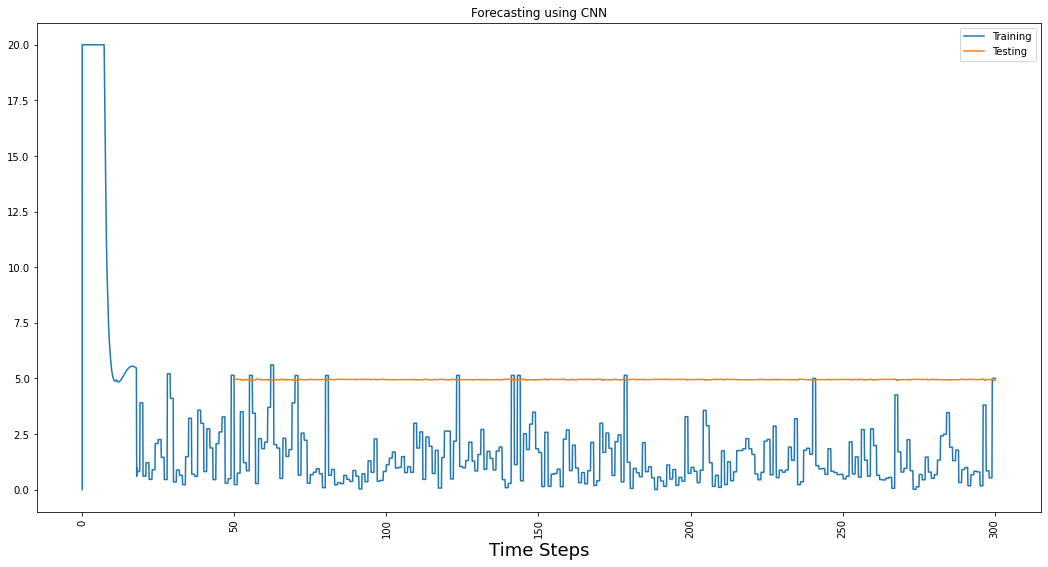

In [70]:
plt.figure(figsize = (18,9))

plt.plot(dates,scaled_data1,label="Training")
plt.plot(test_date,y_pred1,label="Testing")
#plt.plot(test_date,y_test,label="actual ")

plt.xticks(rotation=90)
plt.xlabel('Time Steps',fontsize=18)
plt.legend()
plt.title("Forecasting using CNN")
plt.show()

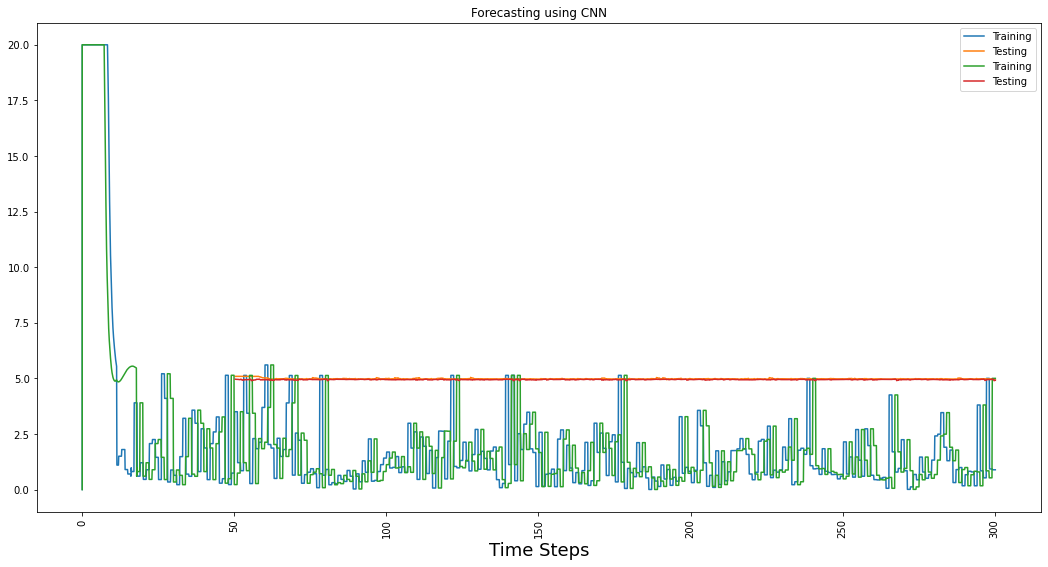

In [71]:
#Combining both
#1
plt.figure(figsize = (18,9))

plt.plot(dates,scaled_data,label="Training1")
plt.plot(test_date,y_pred,label="Testing1")
#plt.plot(test_date,y_test,label="actual ")

plt.plot(dates,scaled_data1,label="Training2")
plt.plot(test_date,y_pred1,label="Testing2")
#plt.plot(test_date,y_test,label="actual ")


plt.xticks(rotation=90)
plt.xlabel('Time Steps',fontsize=18)
plt.legend()
plt.title("Forecasting using CNN")
plt.show()

In [0]:
t=df2['Time']
T12data=df2['DVL3']
X12=np.array(T12data)
y12=df2['DVL3_S']
y12=np.array(y12)
import numpy as np

In [0]:
def split_sequence(sequence, n_steps):
	X12, z12 = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_z1 = sequence[i:end_ix], sequence[end_ix]
		X12.append(seq_x)
		z12.append(seq_z1)
	return array(X12), array(z12)

In [0]:
scaled_data12=X12

In [0]:
# define input sequence
raw_seq12 = X12
# choose a number of time steps
n_steps = 10
# split into samples
X12, z12 = split_sequence(raw_seq12, n_steps)

In [0]:
X12, z12 = split_sequence(raw_seq12, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X12 = X12.reshape((X12.shape[0], X12.shape[1], n_features))

In [0]:
Label12=y12

In [0]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	Label12, y_12 = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		Label12.append(seq_x)
		y_12.append(seq_y)
	return array(Label12), array(y_12)

In [0]:
raw_seq12 = Label12
# choose a number of time steps
n_steps = 10
# split into samples
Label12, y_12 = split_sequence(raw_seq12, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
Label12 = Label12.reshape((Label12.shape[0], Label12.shape[1], n_features))

In [0]:
X_train12  = np.array(X12[:2500])
y_train12 = np.array(y_12[:2500])

X_test12 = np.array(X12[-2500:])
y_test12 = np.array(y_12[-2500:])

In [81]:
print("X_train2 size: {}".format(X_train12.shape))
print("y_train2 size: {}".format(y_train12.shape))
print("X_test2 size: {}".format(X_test12.shape))
print("y_test2 size: {}".format(y_test12.shape))

X_train2 size: (2500, 10, 1)
y_train2 size: (2500,)
X_test2 size: (2500, 10, 1)
y_test2 size: (2500,)


In [0]:
dates = df2['Time']
train_date = dates[:2500]
test_date = dates[-2500:]

In [0]:
X2 = X_train12
y2 = y_train12

In [0]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [0]:
history=model.fit(X2, y2, epochs=20, verbose=0)

In [0]:
#Prediction 
# demonstrate prediction
import math
y_pred2=[]
for i in X_test12:
    
    x_input = i
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    y_pred2.append(float(yhat[0]))

# import numpy as np
# yp = list(np.around(np.array(y_pred),1))
# yt = list(np.around((y_test),1))
    
# y_pred = [ '%.1f' % elem for elem in y_pred ]
# y_test = [ '%.1f' % elem for elem in y_pred ]

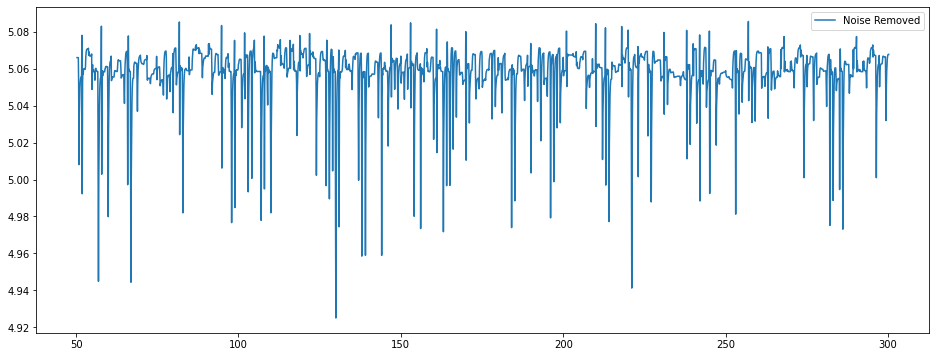

In [87]:
plt.figure(figsize = (16,6))
plt.plot(test_date,y_pred2,label="Noise Removed")
#plt.plot(dates,scaled_data,label="Actual Data")
plt.legend()
plt.show()

In [0]:
scaled_data1_2=scaled_data12[-2500:]

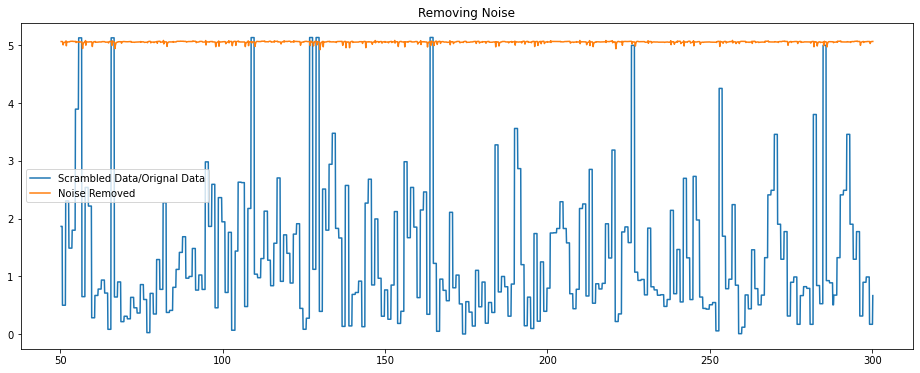

In [89]:
plt.figure(figsize = (16,6))
plt.plot(test_date,scaled_data1_2, label="Scrambled Data/Orignal Data")
plt.plot(test_date,y_pred2,label="Noise Removed")
#plt.plot(dates,scaled_data,label="Actual Data")
plt.legend()
plt.title("Removing Noise")
plt.show()

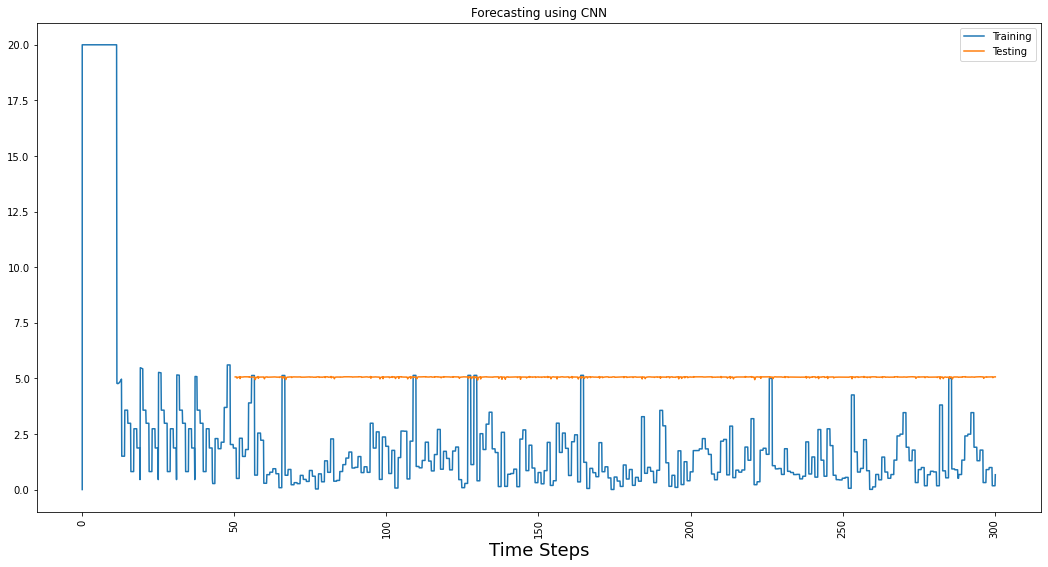

In [90]:
plt.figure(figsize = (18,9))

plt.plot(dates,scaled_data12,label="Training")
plt.plot(test_date,y_pred2,label="Testing")
#plt.plot(test_date,y_test,label="actual ")

plt.xticks(rotation=90)
plt.xlabel('Time Steps',fontsize=18)
plt.legend()
plt.title("Forecasting using CNN")
plt.show()

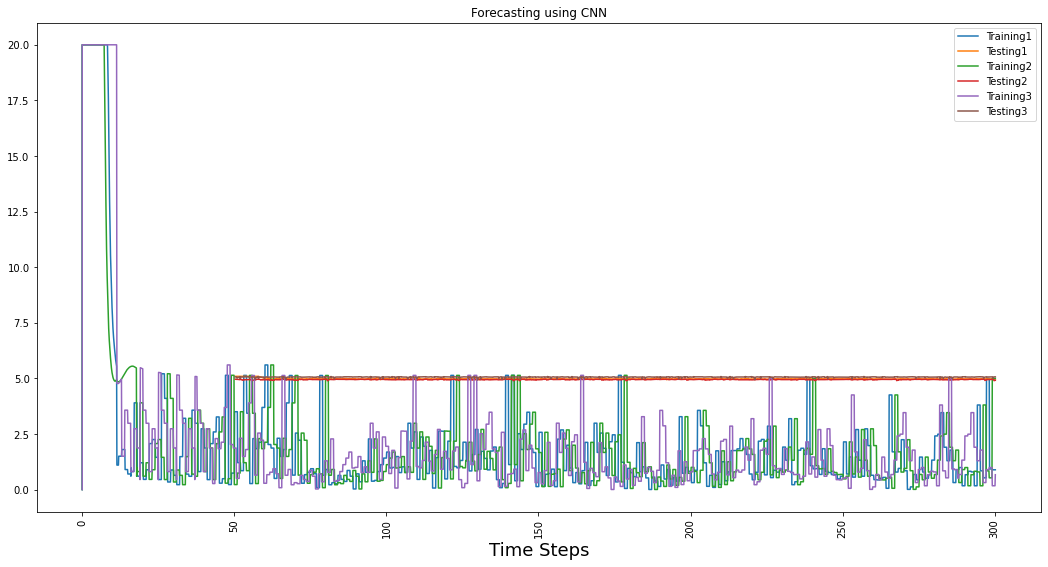

In [91]:
#Combining 1,2 and 3
#1
plt.figure(figsize = (18,9))

plt.plot(dates,scaled_data,label="Training1")
plt.plot(test_date,y_pred,label="Testing1")
#plt.plot(test_date,y_test,label="actual ")
#2

plt.plot(dates,scaled_data1,label="Training2")
plt.plot(test_date,y_pred1,label="Testing2")
#plt.plot(test_date,y_test,label="actual ")

#3

plt.plot(dates,scaled_data12,label="Training3")
plt.plot(test_date,y_pred2,label="Testing3")
#plt.plot(test_date,y_test,label="actual ")

plt.xticks(rotation=90)
plt.xlabel('Time Steps',fontsize=18)
plt.legend()
plt.title("Forecasting using CNN")
plt.show()

In [0]:
#DVL4
t=df2['Time']
T13data=df2['DVL4']
X13=np.array(T13data)
y13=df2['DVL4_S']
y13=np.array(y13)
import numpy as np

In [0]:
def split_sequence(sequence, n_steps):
	X13, z13 = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_z12 = sequence[i:end_ix], sequence[end_ix]
		X13.append(seq_x)
		z13.append(seq_z12)
	return array(X13), array(z13)

In [0]:
scaled_data13=X13

In [95]:
X13

array([ 0.        ,  0.        , 20.        , ...,  0.31445754,
        0.31445754,  0.31445754])

In [96]:
X13.shape

(3005,)

In [0]:
# define input sequence
raw_seq13 = X13
# choose a number of time steps
n_steps = 10
# split into samples
X13, z13 = split_sequence(raw_seq13, n_steps)

In [0]:
X13, z13 = split_sequence(raw_seq13, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X13 = X13.reshape((X13.shape[0], X13.shape[1], n_features))

In [0]:
Label13=y13

In [0]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	Label13, y_13 = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		Label13.append(seq_x)
		y_13.append(seq_y)
	return array(Label13), array(y_13)

In [0]:
raw_seq13 = Label13
# choose a number of time steps
n_steps = 10
# split into samples
Label13, y_13 = split_sequence(raw_seq13, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
Label13 = Label13.reshape((Label13.shape[0], Label13.shape[1], n_features))

In [0]:
X_train13  = np.array(X13[:2500])
y_train13 = np.array(y_13[:2500])

X_test13 = np.array(X13[-2500:])
y_test13 = np.array(y_13[-2500:])

In [103]:
print("X_train3 size: {}".format(X_train13.shape))
print("y_train3 size: {}".format(y_train13.shape))
print("X_test3 size: {}".format(X_test13.shape))
print("y_test3 size: {}".format(y_test13.shape))

X_train3 size: (2500, 10, 1)
y_train3 size: (2500,)
X_test3 size: (2500, 10, 1)
y_test3 size: (2500,)


In [0]:
dates = df2['Time']
train_date = dates[:2500]
test_date = dates[-2500:]

In [0]:
X3 = X_train13
y3 = y_train13

In [0]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [0]:
history=model.fit(X3, y3, epochs=20, verbose=0)

In [0]:
#Prediction 
# demonstrate prediction
import math
y_pred3=[]
for i in X_test13:
    
    x_input = i
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    y_pred3.append(float(yhat[0]))

# import numpy as np
# yp = list(np.around(np.array(y_pred),1))
# yt = list(np.around((y_test),1))
    
# y_pred = [ '%.1f' % elem for elem in y_pred ]
# y_test = [ '%.1f' % elem for elem in y_pred ]

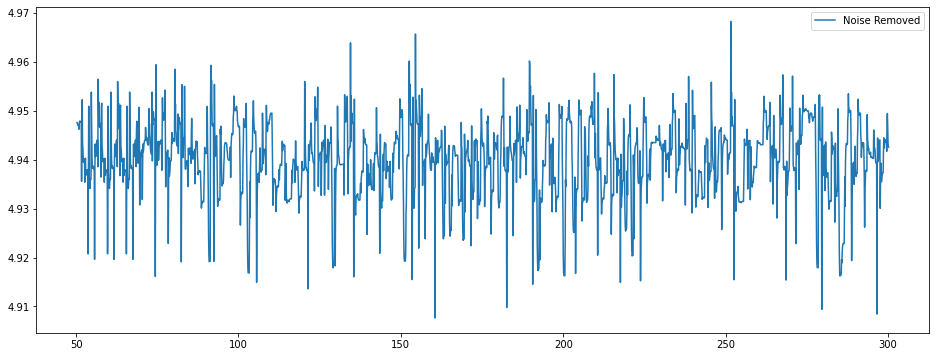

In [109]:
plt.figure(figsize = (16,6))
plt.plot(test_date,y_pred3,label="Noise Removed")
#plt.plot(dates,scaled_data,label="Actual Data")
plt.legend()
plt.show()

In [0]:
scaled_data13_2=scaled_data13[-2500:]

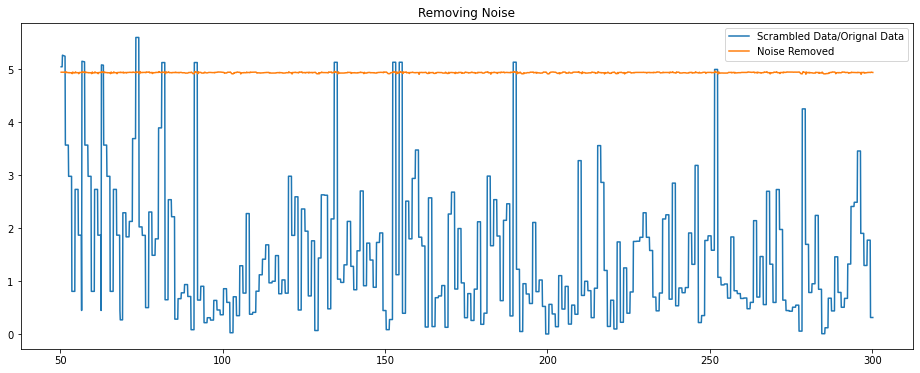

In [111]:
plt.figure(figsize = (16,6))
plt.plot(test_date,scaled_data13_2, label="Scrambled Data/Orignal Data")
plt.plot(test_date,y_pred3,label="Noise Removed")
#plt.plot(dates,scaled_data,label="Actual Data")
plt.legend()
plt.title("Removing Noise")
plt.show()

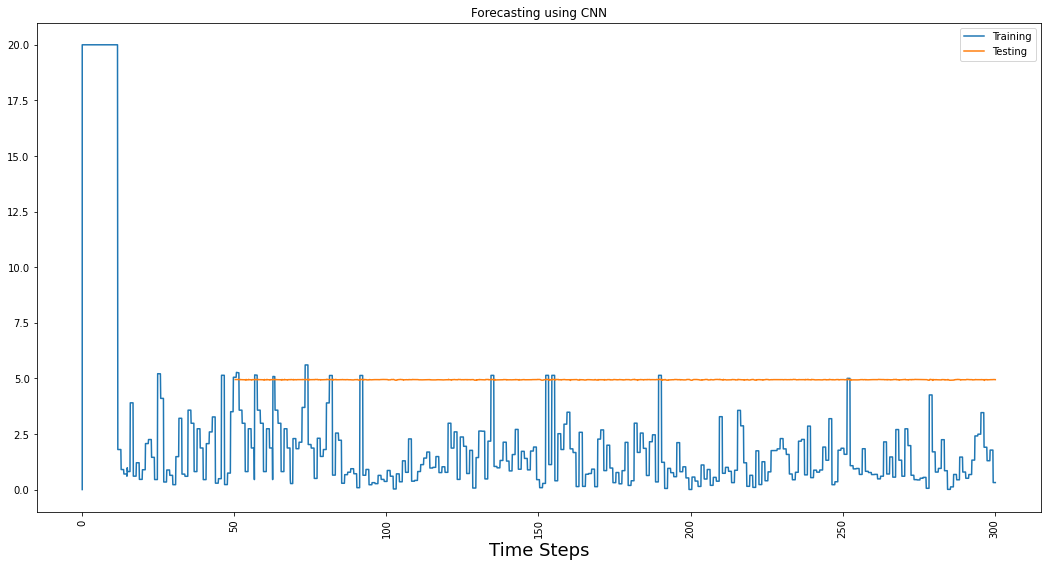

In [112]:
plt.figure(figsize = (18,9))

plt.plot(dates,scaled_data13,label="Training")
plt.plot(test_date,y_pred3,label="Testing")
#plt.plot(test_date,y_test,label="actual ")

plt.xticks(rotation=90)
plt.xlabel('Time Steps',fontsize=18)
plt.legend()
plt.title("Forecasting using CNN")
plt.show()

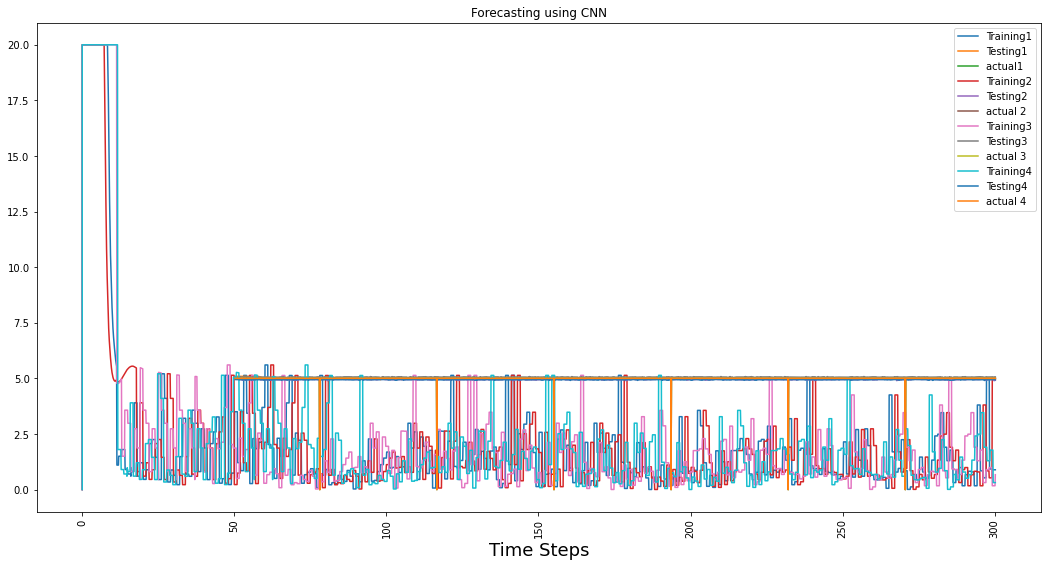

In [116]:
#Combining all four DVL beams
#Combining 1,2 and 3
#1
plt.figure(figsize = (18,9))

plt.plot(dates,scaled_data,label="Training1")
plt.plot(test_date,y_pred,label="Testing1")
plt.plot(test_date,y_test,label="actual1 ")
#2

plt.plot(dates,scaled_data1,label="Training2")
plt.plot(test_date,y_pred1,label="Testing2")
plt.plot(test_date,y_test,label="actual 2 ")

#3

plt.plot(dates,scaled_data12,label="Training3")
plt.plot(test_date,y_pred2,label="Testing3")
plt.plot(test_date,y_test,label="actual 3 ")

#4

plt.plot(dates,scaled_data13,label="Training4")
plt.plot(test_date,y_pred3,label="Testing4")
plt.plot(test_date,y_test,label="actual 4 ")


plt.xticks(rotation=90)
plt.xlabel('Time Steps',fontsize=18)
plt.legend()
plt.title("Forecasting using CNN")
plt.show()